# Objective of the model:
 Determine the price range of the mobile based on its features, we do not have to predict actual price but a price range indicating how high the price is

# About thw dataset:
This dataset contains 2007 records of features contains the target column which is divided into four classes:

value of:
- 0(low cost)
- 1(medium cost)
- 2(high cost)
- 3(very high cost)


# Inputs: 
 1. ***battery_power***: 
- Total energy a battery can store in one time measured in mAh
 2. ***blue***:        
- Has bluetooth or not
 3. ***clock_speed***:
- speed at which microprocessor executes instructions
 4. ***dual_sim***:
- Has dual sim support or not
 5. ***fc***:
- Front Camera mega pixels
 6. ***four_g***:
- Has 4G or not
 7. ***int_memory***:
- Internal Memory in Gigabytes
 8. ***m_dep***:
- Mobile Depth in cm
 9. ***mobile_wt***:
- Weight of mobile phone
 10. ***n_cores***:
- Number of cores of processor
 11. ***pc***:
- Primary Camera mega pixels
 12. ***px_height***:
- Pixel Resolution Height
 13. ***px_width***:
- Pixel Resolution Width
 14. ***ram***:
- Random Access Memory in Mega Bytes
 15. ***sc_h***:
- Screen Height of mobile in cm
 16. ***sc_w***:
- Screen Width of mobile in cm
 17. ***talk_time***:
- longest time that a single battery charge will last when you are
 18. ***three_g***:
- Has 3G or not
 19. ***touch_screen***: 
- Has touch screen or not
 20. ***wifi***:
- Has wifi or not
 
 ## The target :
 
 22. ***price_range***:
- This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
from datasist.structdata import detect_outliers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report ,accuracy_score, confusion_matrix, recall_score, precision_score,make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
import joblib

warnings.filterwarnings('ignore')

#  Read the dataset

In [178]:
df = pd.read_csv('Mobile__Price.csv')
df.head(10)

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,...,sc_h,sc_w,talk_time,blue,dual_sim,four_g,three_g,touch_screen,wifi,price_range
0,842.0,2.2,1.0,7,0.6,188,2,2,20,756,...,9,7,19,No,No,No,No,No,Yes,medium cost
1,1021.0,0.5,0.0,53,0.7,136,3,6,905,1988,...,17,3,7,Yes,Yes,Yes,NaN,Yes,No,high cost
2,563.0,0.5,2.0,41,0.9,145,5,6,1263,1716,...,11,2,9,Yes,Yes,Yes,NaN,Yes,No,high cost
3,615.0,2.5,0.0,10,0.8,131,6,9,1216,1786,...,16,8,11,Yes,No,No,NaN,No,No,high cost
4,1821.0,1.2,13.0,44,0.6,141,2,14,1208,1212,...,8,2,15,Yes,No,Yes,NaN,Yes,No,medium cost
5,1859.0,0.5,3.0,22,0.7,164,1,7,1004,1654,...,17,1,10,No,Yes,No,NaN,No,No,medium cost
6,1821.0,1.7,4.0,10,0.8,139,8,10,381,1018,...,13,8,18,No,No,Yes,NaN,No,Yes,very high cost
7,1954.0,0.5,0.0,24,0.8,187,4,0,512,1149,...,16,3,5,No,Yes,No,NaN,Yes,Yes,low cost
8,1445.0,0.5,0.0,53,0.7,174,7,14,386,836,...,17,1,20,Yes,No,No,NaN,No,No,low cost
9,509.0,0.6,2.0,9,0.1,93,5,15,1137,1224,...,19,10,12,Yes,Yes,Yes,NaN,No,No,low cost


In [179]:
df.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2008 entries, 0 to 2007
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   float64
 1   clock_speed    2000 non-null   float64
 2   fc             2000 non-null   float64
 3   int_memory     2008 non-null   int64  
 4   m_dep          2008 non-null   float64
 5   mobile_wt      2008 non-null   int64  
 6   n_cores        2008 non-null   int64  
 7   pc             2008 non-null   int64  
 8   px_height      2008 non-null   int64  
 9   px_width       2008 non-null   int64  
 10  ram            2008 non-null   int64  
 11  sc_h           2008 non-null   int64  
 12  sc_w           2008 non-null   int64  
 13  talk_time      2008 non-null   int64  
 14  blue           2008 non-null   object 
 15  dual_sim       2008 non-null   object 
 16  four_g         2008 non-null   object 
 17  three_g        1935 non-null   object 
 18  touch_sc

# Deal With wrong datatype

In [180]:
# no wrong data type

In [181]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.518500,439.418206,501.0,851.75,1226.0,1615.25,1998.0
clock_speed,2000.0,1.522250,0.816004,0.5,0.70,1.5,2.20,3.0
fc,2000.0,4.309500,4.341444,0.0,1.00,3.0,7.00,19.0
int_memory,2008.0,32.046813,18.136607,2.0,16.00,32.0,48.00,64.0
m_dep,2008.0,0.501544,0.288533,0.1,0.20,0.5,0.80,1.0
mobile_wt,2008.0,140.247012,35.413716,80.0,109.00,141.0,170.00,200.0
n_cores,2008.0,4.521414,2.286753,1.0,3.00,4.0,7.00,8.0
pc,2008.0,9.900398,6.067388,0.0,5.00,10.0,15.00,20.0
px_height,2008.0,645.434263,443.263423,0.0,284.00,565.5,946.25,1960.0
px_width,2008.0,1252.124502,432.495142,500.0,874.75,1247.0,1633.00,1998.0


#  deal with Null Data

In [182]:
df.isnull().sum()

battery_power     8
clock_speed       8
fc                8
int_memory        0
m_dep             0
mobile_wt         0
n_cores           0
pc                0
px_height         0
px_width          0
ram               0
sc_h              0
sc_w              0
talk_time         0
blue              0
dual_sim          0
four_g            0
three_g          73
touch_screen      0
wifi              0
price_range       0
dtype: int64

In [183]:
df['three_g'] = df['three_g'].fillna(df['three_g'].mode()[0])

In [184]:
df.isnull().sum()

battery_power    8
clock_speed      8
fc               8
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
blue             0
dual_sim         0
four_g           0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [185]:
df.dropna(inplace=True)
df.isnull().sum()

battery_power    0
clock_speed      0
fc               0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
blue             0
dual_sim         0
four_g           0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

# Deal With Duplicated Values

In [186]:
df.duplicated().sum()

0

In [151]:
# there is no duplicated values

# Analysis and Visualization

In [152]:
categ_features = df[['blue','dual_sim','four_g','three_g','touch_screen','wifi','price_range']]
numer_features = df.drop('blue', axis=1).drop('dual_sim', axis=1).drop('four_g', axis=1).drop('three_g', axis=1).drop('wifi', axis=1).drop('touch_screen', axis=1).drop('price_range', axis=1)


## Univariate Plots

### numerical

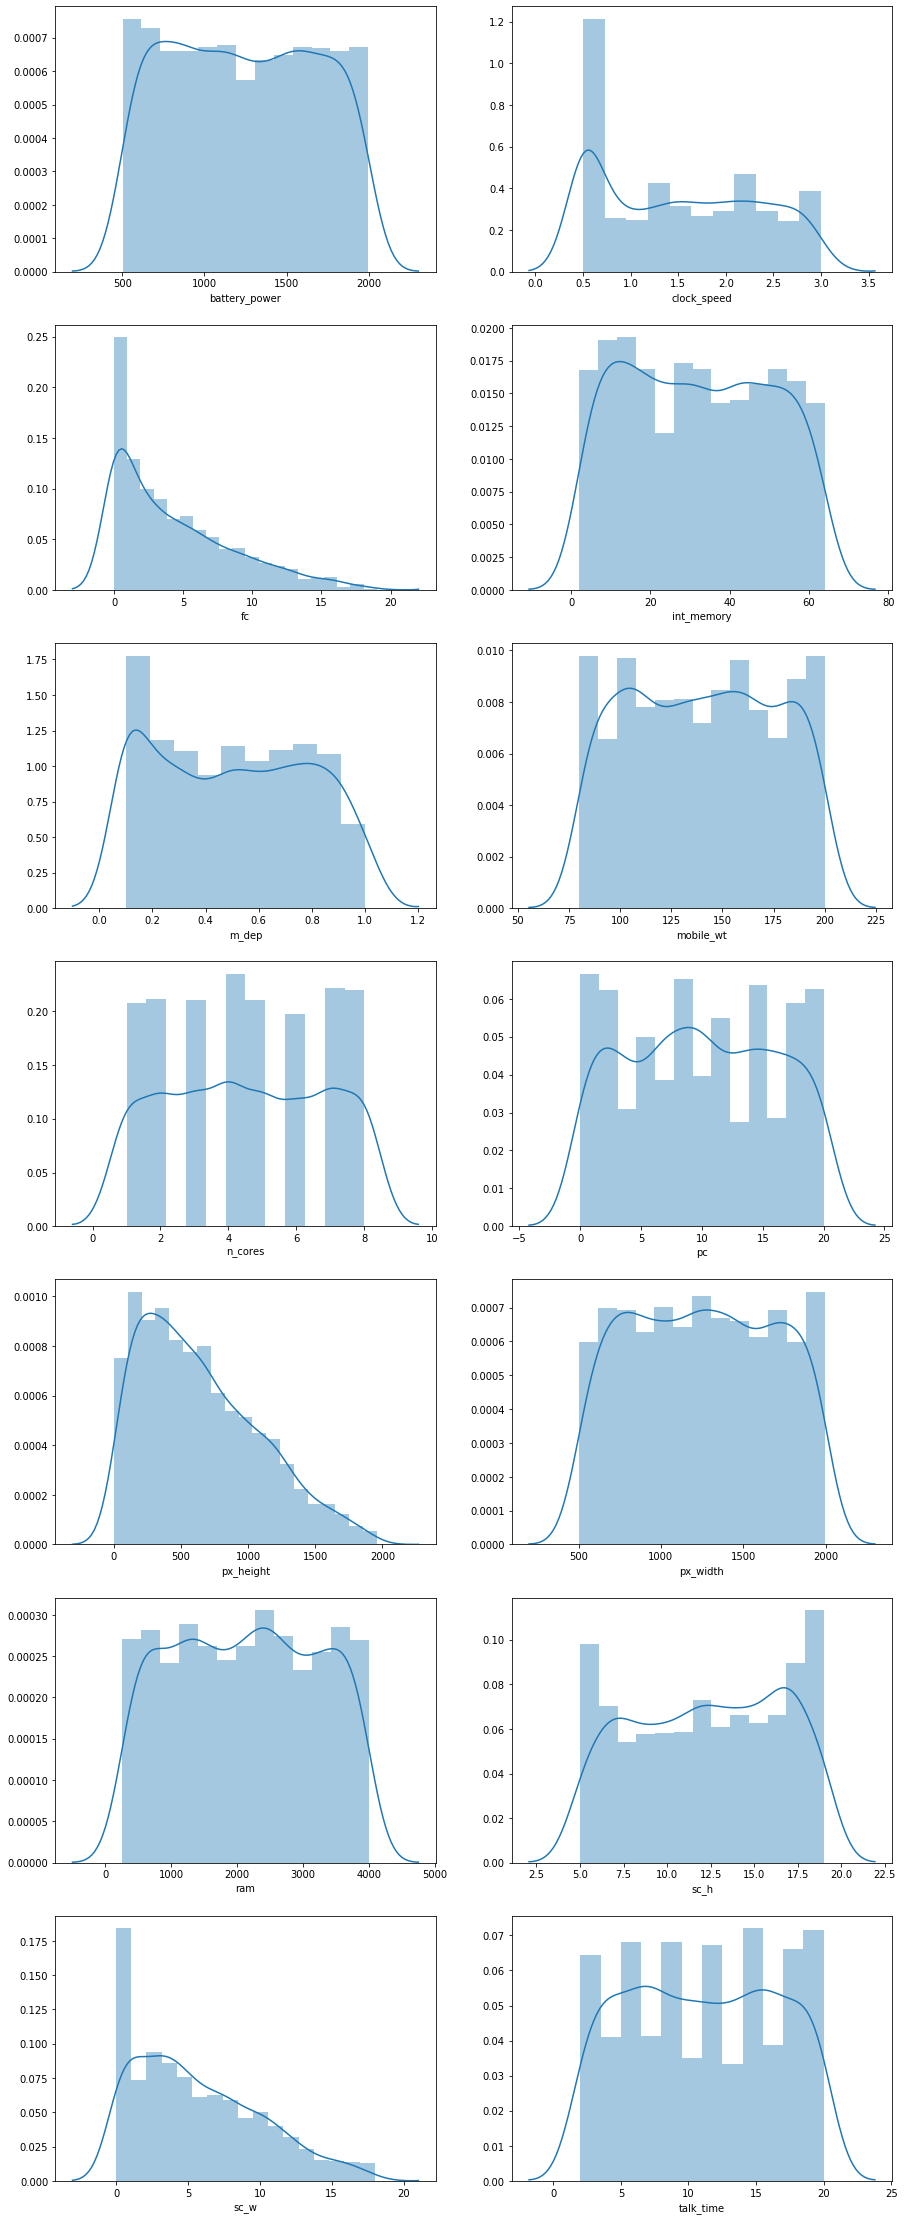

In [153]:

fig, axes = plt.subplots(nrows=7, ncols=2,figsize = (15, 40))
for i, column in enumerate(numer_features.columns):
    sns.distplot(numer_features[column],ax=axes.flatten()[i])     

# Outliers Detection

In [154]:
outliers = detect_outliers(df, 0,numer_features.columns)
len(outliers)

20

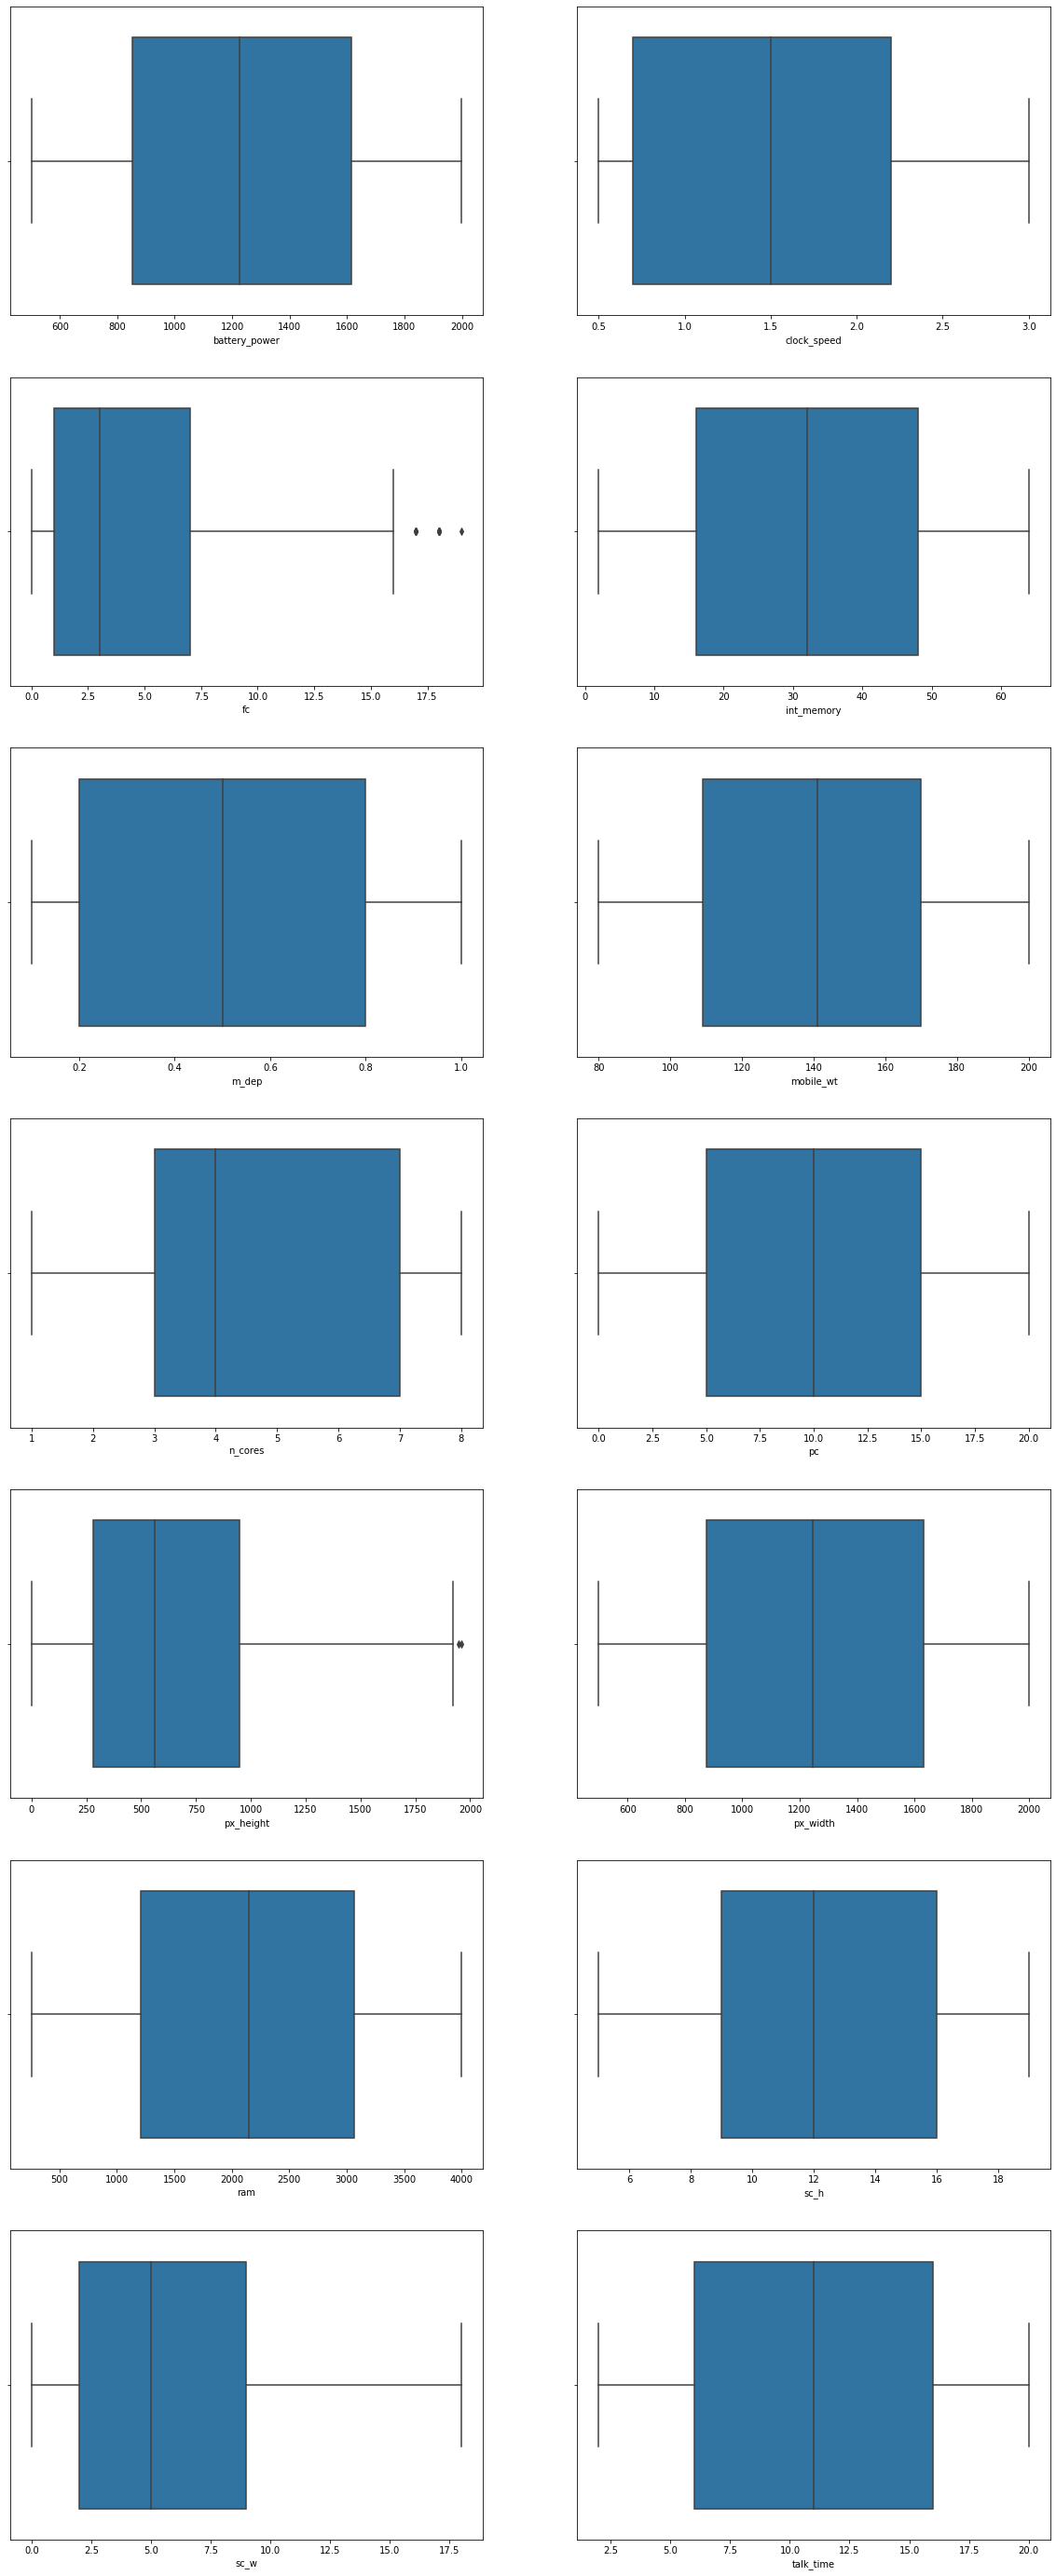

In [155]:
fig, axes = plt.subplots(nrows=7, ncols=2,figsize = (20, 50))
for i, column in enumerate(numer_features.columns):
    sns.boxplot(numer_features[column],ax=axes.flatten()[i])

In [156]:
# I decided not to delete them because they are real and important values in the data

### categorical

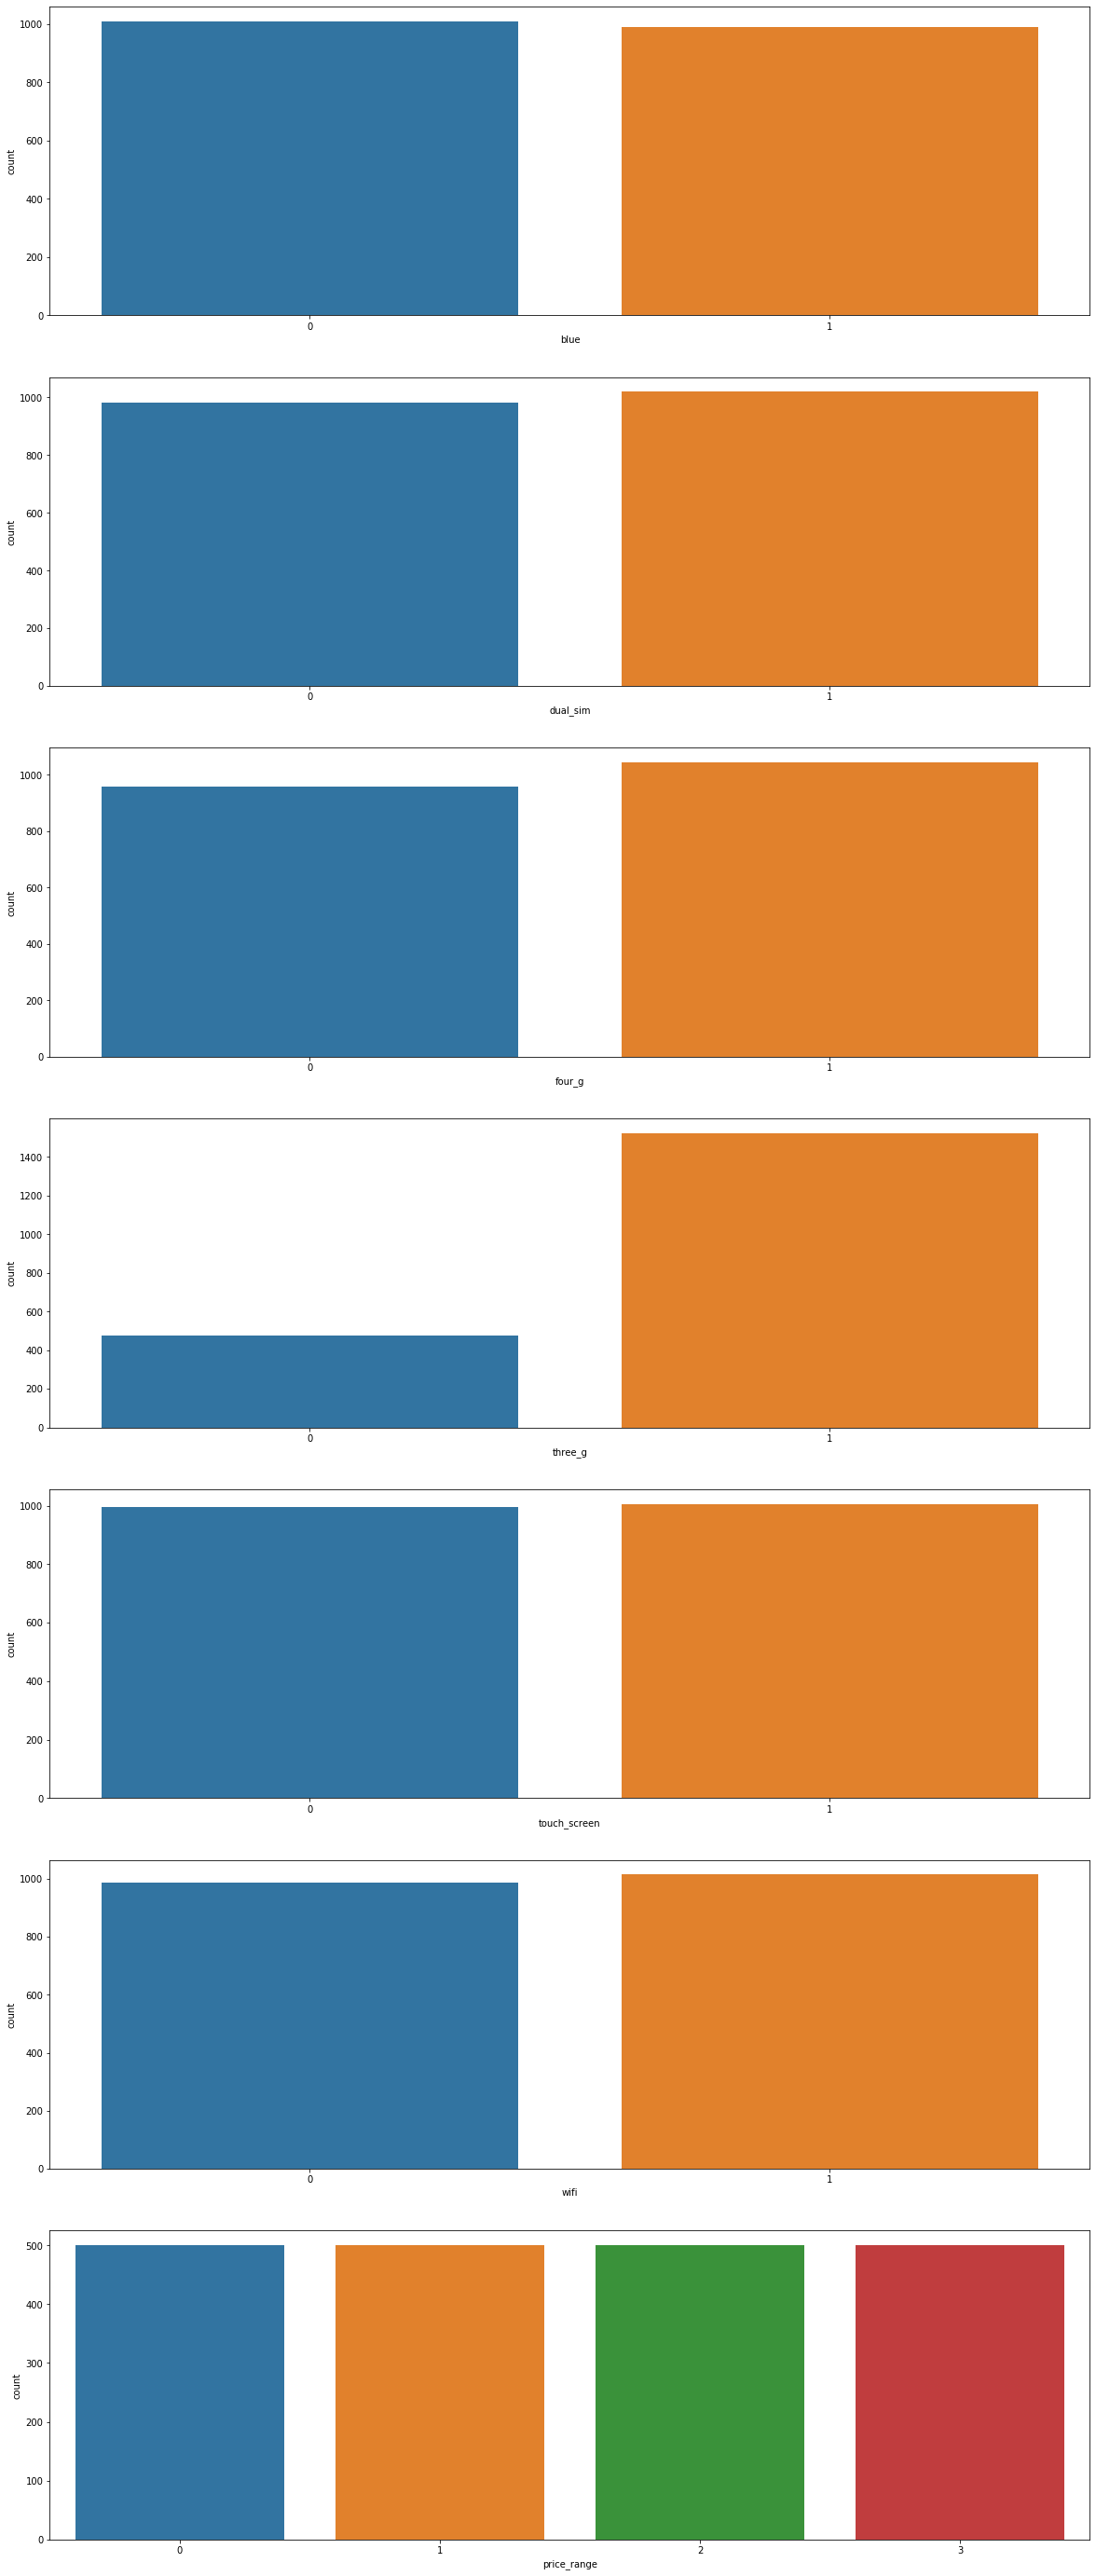

In [157]:
fig, ax = plt.subplots(7,1,figsize = (20, 50))
sns.countplot(categorical_features['blue'], ax=ax[0])
sns.countplot(categorical_features['dual_sim'], ax=ax[1])
sns.countplot(categorical_features['four_g'], ax=ax[2])
sns.countplot(categorical_features['three_g'], ax=ax[3])
sns.countplot(categorical_features['touch_screen'], ax=ax[4])
sns.countplot(categorical_features['wifi'], ax=ax[5])
sns.countplot(categorical_features['price_range'], ax=ax[6])


## Bivariate Plots

### Numerical & Categorical

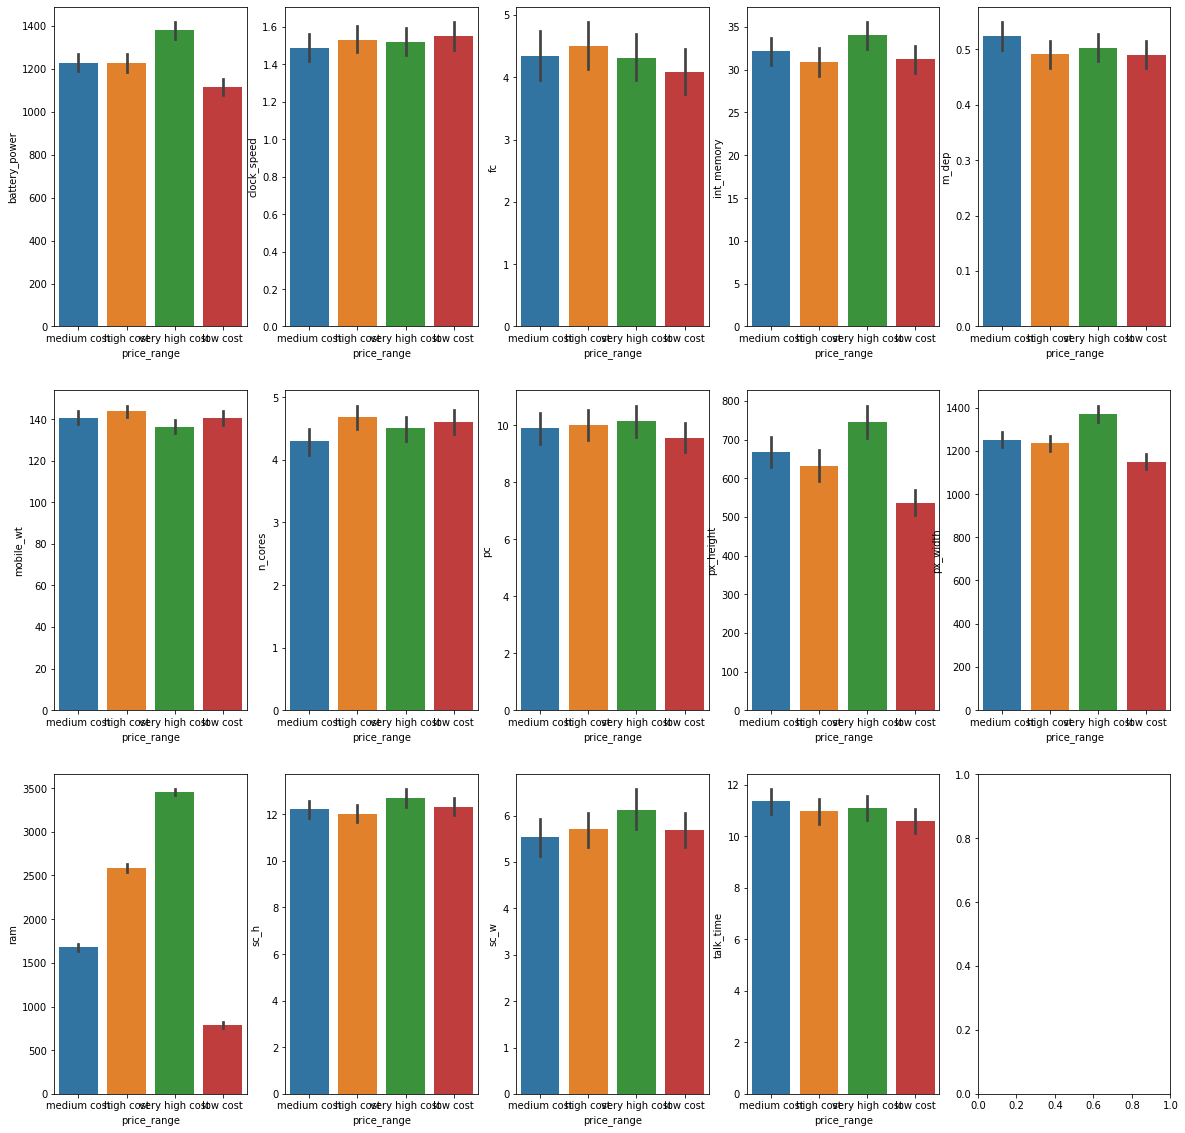

In [158]:
fig, axes = plt.subplots(nrows=3, ncols=5,figsize = (20, 20))
for i, column in enumerate(numer_features.columns):
    sns.barplot(x='price_range', y=column, data=df,ax=axes[i//5,i%5])

ValueError: Neither the `x` nor `y` variable appears to be numeric.

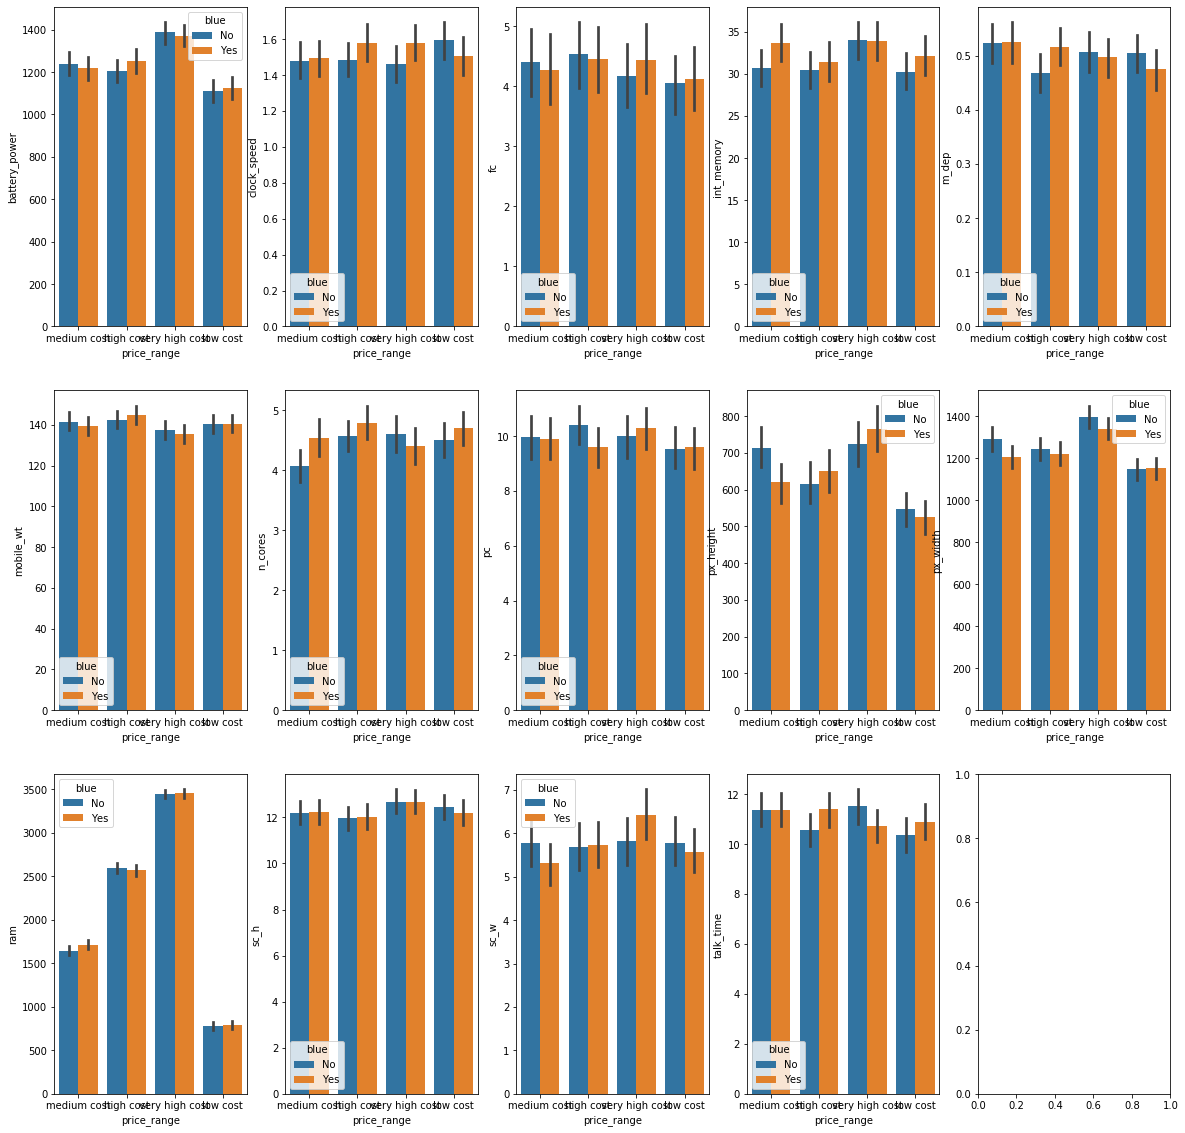

In [159]:
fig, axes = plt.subplots(nrows=3, ncols=5,figsize = (20, 20))
for i, column in enumerate(numerical_features.columns):
    sns.barplot(x='price_range', y=column,hue = 'blue', data=df,ax=axes[i//5,i%5])

ValueError: Neither the `x` nor `y` variable appears to be numeric.

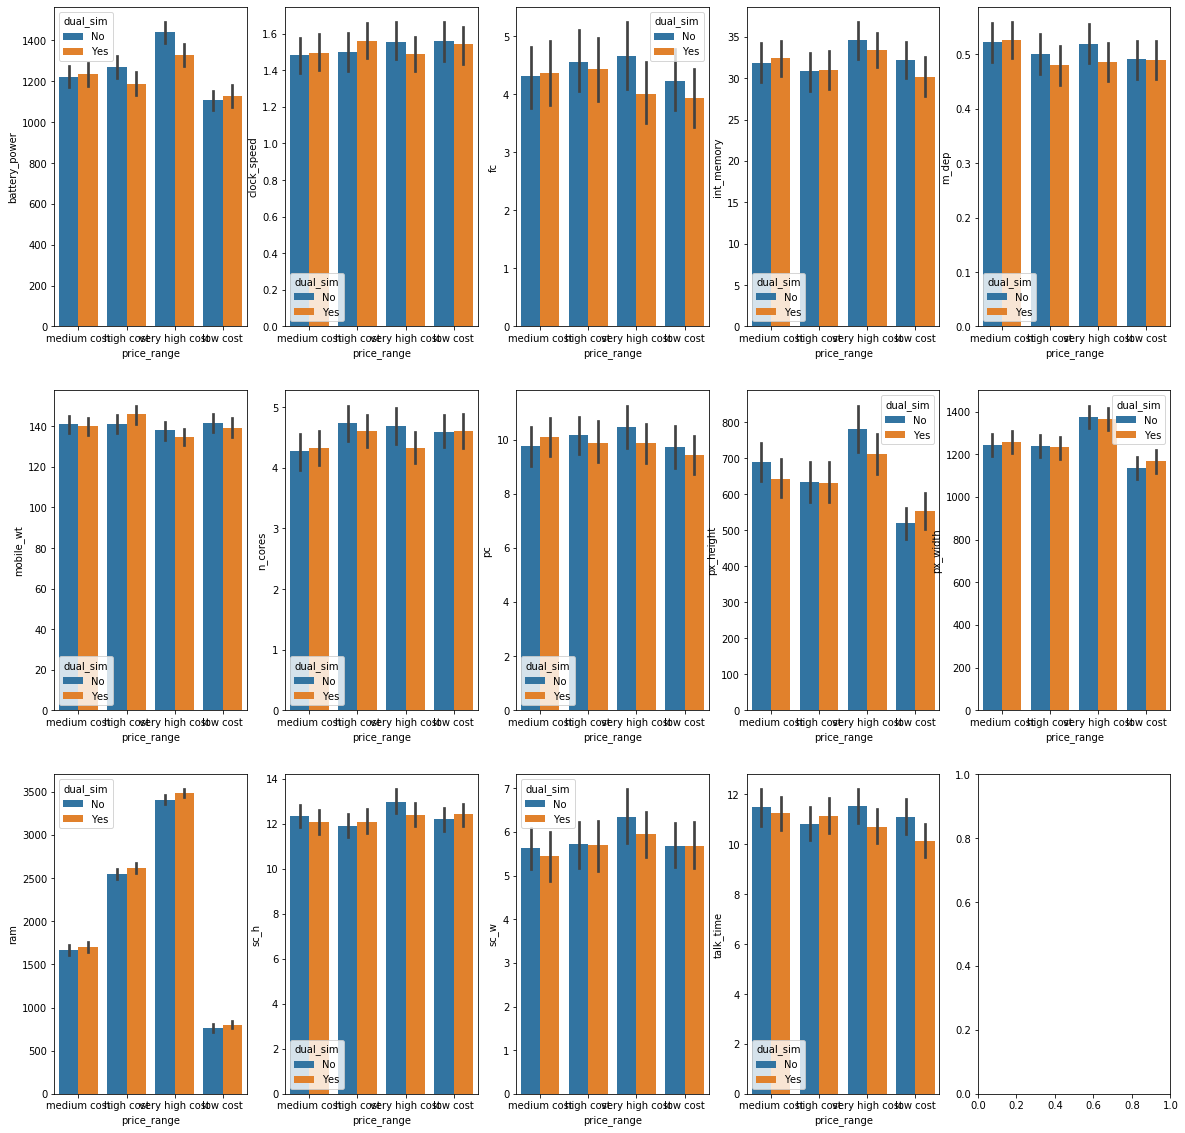

In [160]:
fig, axes = plt.subplots(nrows=3, ncols=5,figsize = (20, 20))
for i, column in enumerate(numerical_features.columns):
    sns.barplot(x='price_range', y=column,hue = 'dual_sim', data=df,ax=axes[i//5,i%5])

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=5,figsize = (20, 20))
for i, column in enumerate(numerical_features.columns):
    sns.barplot(x='price_range', y=column,hue = 'four_g', data=df,ax=axes[i//5,i%5])

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=5,figsize = (20, 20))
for i, column in enumerate(numerical_features.columns):
    sns.barplot(x='price_range', y=column,hue = 'three_g', data=df,ax=axes[i//5,i%5])

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=5,figsize = (20, 20))
for i, column in enumerate(numerical_features.columns):
    sns.barplot(x='price_range', y=column,hue = 'touch_screen', data=df,ax=axes[i//5,i%5])

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=5,figsize = (20, 20))
for i, column in enumerate(numerical_features.columns):
    sns.barplot(x='price_range', y=column,hue = 'wifi', data=df,ax=axes[i//5,i%5])

# Encoding

In [187]:

df['blue'] = df['blue'].apply(lambda x: 1 if x== "Yes" else 0)
df['dual_sim'] = df['dual_sim'].apply(lambda x: 1 if x== "Yes" else 0)
df['four_g'] = df['four_g'].apply(lambda x: 1 if x== "Yes" else 0)
df['three_g'] = df['three_g'].apply(lambda x: 1 if x== "Yes" else 0)
df['touch_screen'] = df['touch_screen'].apply(lambda x: 1 if x== "Yes" else 0)
df['wifi'] = df['wifi'].apply(lambda x: 1 if x== "Yes" else 0)
df['price_range'] = df['price_range'].apply(lambda x: 1 if x== "low cost" else 2 if x == "medium cost" else 3 if x == "high cost"  else 4)
df.head(5)

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,...,sc_h,sc_w,talk_time,blue,dual_sim,four_g,three_g,touch_screen,wifi,price_range
0,842.0,2.2,1.0,7,0.6,188,2,2,20,756,...,9,7,19,0,0,0,0,0,1,2
1,1021.0,0.5,0.0,53,0.7,136,3,6,905,1988,...,17,3,7,1,1,1,1,1,0,3
2,563.0,0.5,2.0,41,0.9,145,5,6,1263,1716,...,11,2,9,1,1,1,1,1,0,3
3,615.0,2.5,0.0,10,0.8,131,6,9,1216,1786,...,16,8,11,1,0,0,1,0,0,3
4,1821.0,1.2,13.0,44,0.6,141,2,14,1208,1212,...,8,2,15,1,0,1,1,1,0,2


# Feture Selection


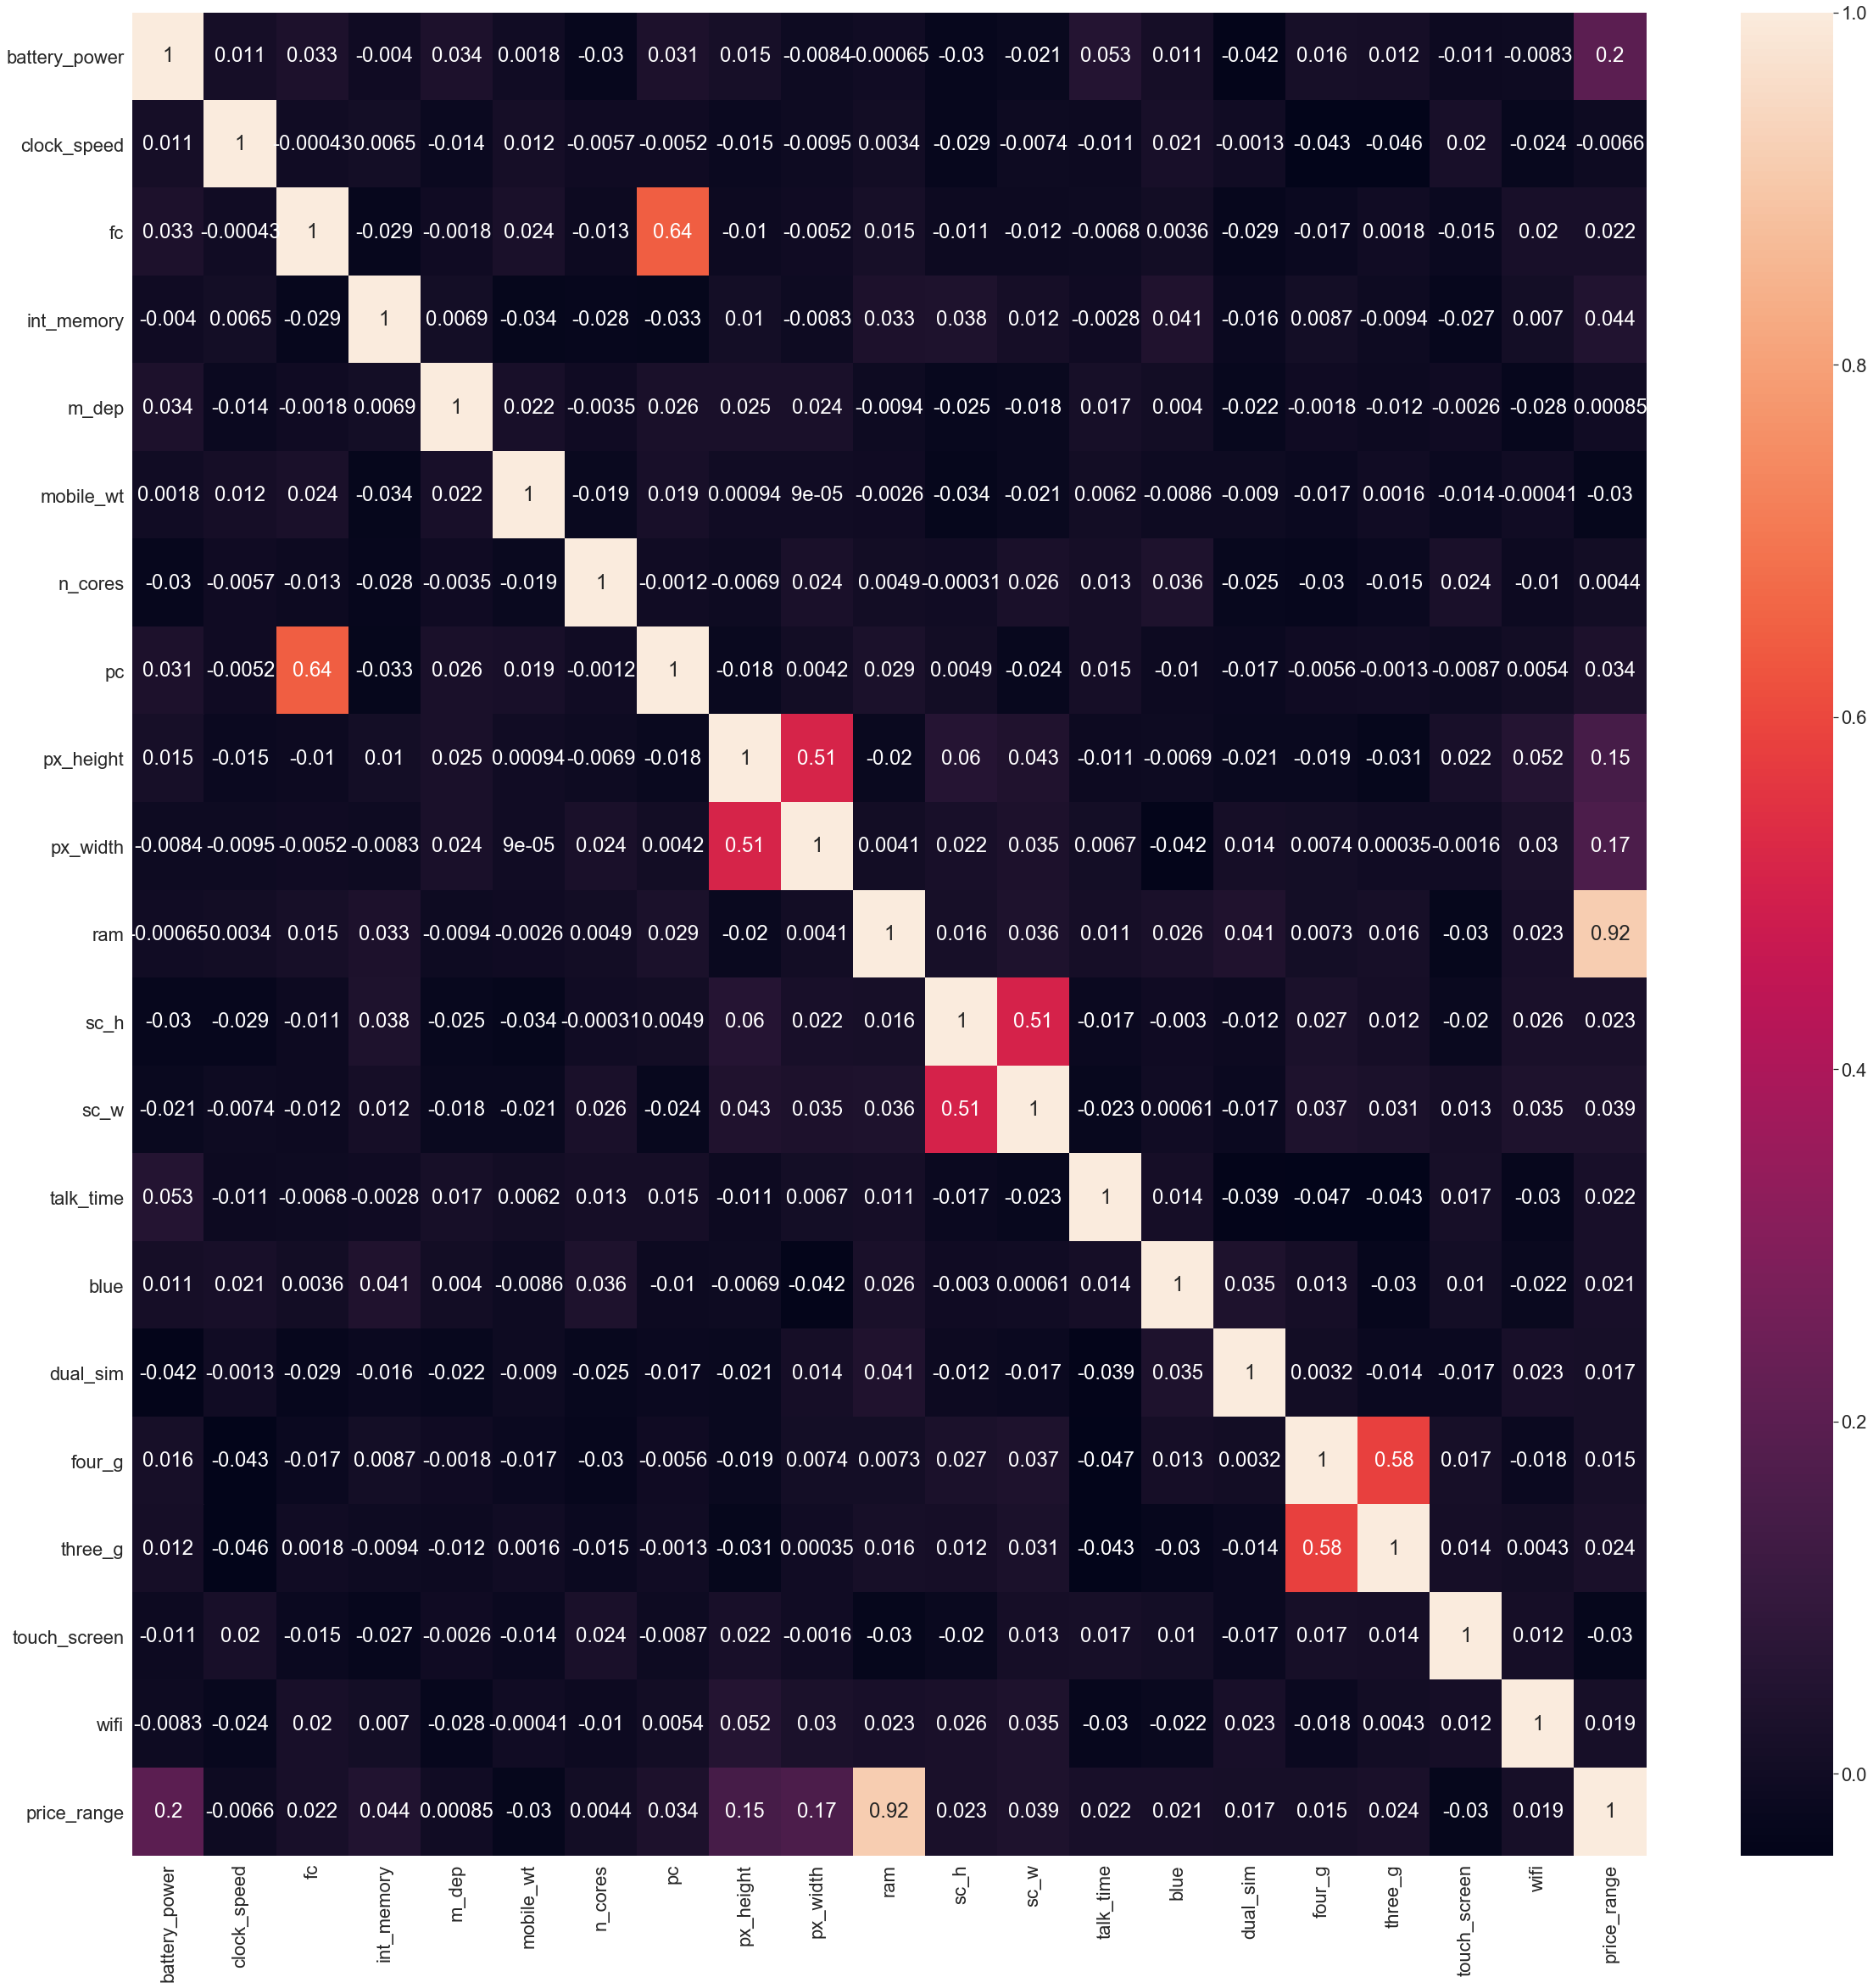

In [188]:
sns.set(rc={'figure.figsize':(40,40)},font_scale=2)
sns.heatmap(df.corr(),annot=True)

In [189]:
df.corr()['price_range']

battery_power    0.200723
clock_speed     -0.006606
fc               0.021998
int_memory       0.044435
m_dep            0.000853
mobile_wt       -0.030302
n_cores          0.004399
pc               0.033599
px_height        0.148858
px_width         0.165818
ram              0.917046
sc_h             0.022986
sc_w             0.038711
talk_time        0.021859
blue             0.020573
dual_sim         0.017444
four_g           0.014772
three_g          0.023611
touch_screen    -0.030411
wifi             0.018785
price_range      1.000000
Name: price_range, dtype: float64

In [199]:
top_feature = df.corr().index[abs(df.corr()['price_range'])>=0.03]
df[top_feature].head(6)

,battery_power,int_memory,mobile_wt,pc,px_height,px_width,ram,sc_w,touch_screen,price_range
0,842.0,7,188,2,20,756,2549,7,0,2
1,1021.0,53,136,6,905,1988,2631,3,1,3
2,563.0,41,145,6,1263,1716,2603,2,1,3
3,615.0,10,131,9,1216,1786,2769,8,0,3
4,1821.0,44,141,14,1208,1212,1411,2,1,2
5,1859.0,22,164,7,1004,1654,1067,1,0,2


# train_test_split

In [200]:
features = df[top_feature].drop('price_range', axis=1)
target = df['price_range']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=22)

y_train.value_counts()

1    384
4    372
3    372
2    372
Name: price_range, dtype: int64

# Feature Scaling

In [201]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Model Selection

In [202]:
modles = {
    'LogisticRegression' : LogisticRegression(),
    'KNeighborsClassifier' : KNeighborsClassifier(),
    'SVC' : SVC(),
    'RandomForestClassifier' : RandomForestClassifier(),
    'DecisionTreeClassifier' : DecisionTreeClassifier(),
    'GradientBoostingClassifier' : GradientBoostingClassifier()
    
 
}

for modelName,model in modles.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('\n**************************************************',' \n[ **********',modelName,'********** ] ','\n**************************************************')
    
    print('\n      Testing Accurcy : ',accuracy_score(y_test, y_pred))
    print('\n      Training Accurcy : ',accuracy_score(y_train, model.predict(X_train)))
   
    print('\n',classification_report(y_test, y_pred),'\n')


**************************************************  
[ ********** LogisticRegression ********** ]  
**************************************************

      Testing Accurcy :  0.968

      Training Accurcy :  0.978

               precision    recall  f1-score   support

           1       0.97      1.00      0.99       116
           2       0.93      0.98      0.95       128
           3       0.99      0.91      0.95       128
           4       0.98      0.99      0.99       128

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500
 


**************************************************  
[ ********** KNeighborsClassifier ********** ]  
**************************************************

      Testing Accurcy :  0.668

      Training Accurcy :  0.8213333333333334

               precision    recall  f1-score   support

           1       0.71      0.80      0.75       116
 

# Model improvement

In [203]:
# I chose the LogisticRegression and the GradientBoostingClassifier because they have the highest accuracy

### first the logistic regression

In [205]:
# define models and parameters
gd_model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['none', 'l1', 'l2', 'elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=gd_model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0, verbose=2)
grid_result = grid_search.fit(X_train, y_train)




# summarize results
print(grid_search.best_params_)

gd_model = LogisticRegression(**grid_search.best_params_)
gd_model.fit(X_train, y_train)
y_pred = gd_model.predict(X_test)


print('\n**************************************************',' \n[ ',gd_model,' ] ','\n**************************************************')

print('\t      Training Accurcy : ',accuracy_score(y_train, gd_model.predict(X_train)))
print('\t      Test ing Accurcy : ',accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred),'\n')





Fitting 30 folds for each of 60 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 552 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:    8.0s finished


{'C': 100, 'penalty': 'none', 'solver': 'newton-cg'}

**************************************************  
[  LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)  ]  
**************************************************
	      Training Accurcy :  0.984
	      Test ing Accurcy :  0.966
              precision    recall  f1-score   support

           1       0.97      1.00      0.98       116
           2       0.95      0.96      0.95       128
           3       0.96      0.94      0.95       128
           4       0.99      0.97      0.98       128

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500
 


### second the Gradient Boosting Classifier

In [206]:
# define models and parameters
gbc_model = GradientBoostingClassifier()
n_estimators = [10, 100, 1000]
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 7, 9]
# define grid search
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=gbc_model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0,verbose=2)
grid_result = grid_search.fit(X_train, y_train)


# summarize results

print(grid_search.best_params_)

gbc_model = GradientBoostingClassifier(**grid_search.best_params_)
gbc_model.fit(X_train, y_train)
y_pred = gbc_model.predict(X_test)

print('\n**************************************************',' \n[ ',gbc_model,' ] ','\n**************************************************')
print('\t      Training Accurcy : ',accuracy_score(y_train, gbc_model.predict(X_train)))
print('\t      Test ing Accurcy : ',accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred),'\n')




Fitting 30 folds for each of 81 candidates, totalling 2430 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed: 22.3min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed: 29.6min
[Parallel(n_jobs=-1)]: Done 2430 out of 2430 | elapsed: 32.7min finished


{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.5}

**************************************************  
[  GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.5, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)  ]  
**************************************************
	      Training Accurcy :  1.0
	      Test ing Accurcy :  0.918
              precision    recall  f1-score   

In [207]:
joblib.dump(gd_model, 'model.h5')
#joblib.dump(gbc_model, 'model.h5')


['model.h5']

In [208]:
joblib.dump(scaler, 'scaler.h5')

['scaler.h5']